## Analisis univariado para variables categoricas

En esta primera parte nos centraremos en analizar las variables categoricas del dataset individualmente, ya que buscamos pulir incluso mas los datos y darle un mejor forma (prepararlos mejor de ser necesario) para tener un analisis bivariado exitoso  y eventualmente que esto ayude a la creacion de un modelo logistico optimo tambien

In [1]:
# Importamos las librerias con las que trabajaremos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_bank_ready = pd.read_csv("bank_ready.csv")

Vamos a identificar los tipos de variables que conforman el dataset

In [2]:
df_bank_ready.dtypes

age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day               int64
month            object
campaign          int64
pdays             int64
previous          int64
poutcome         object
get_account_?    object
dtype: object

La columna pdays hace referencia a que si hubo contacto antes con la persona previamente esta asume un valor negativo de no ser asi y uno positivo hace referencia a la cantidad de dias desde el ultimo contacto para poder lidiar bien con esto hemos decidido hacer lo siguiente:
* Se crea la columna hubo_contacto_? que tendra un no si en pdays hay un valor negativo y un si cuando en pdays haya un valor positivo
* Los valores negativos en pdays se sustituyen por 0 haciendo referencia a que no han pasado dias desde el ultimo contacto (porque nunca ha existido ese contacto con la persona previamente) y los positivos se mantinen es la cantidad de dias que han pasado

In [3]:
print("--- Estado Inicial de la columna 'pdays' ---")
print(df_bank_ready[['pdays']].head())
print(f"Valores únicos en 'pdays' antes de la transformación: {df_bank_ready['pdays'].unique()}")

# --- Creación de la columna hubo_contacto_? ---
# Si pdays es -1 o negativo, hubo_contacto_? será 'no'.
# Si pdays es mayor que 0, hubo_contacto_? será 'yes'.
df_bank_ready['hubo_contacto_?'] = np.where(df_bank_ready['pdays'] < 0, 'no', 'yes')

# Opcional: Convertir la nueva columna a tipo 'category' para eficiencia
df_bank_ready['hubo_contacto_?'] = df_bank_ready['hubo_contacto_?'].astype('category')

print("\n--- Columna 'hubo_contacto_?' Creada ---")

# --- Modificación de la columna 'pdays' ---
# Sustituir cualquier valor menor a 0 por 0 en la columna 'pdays'
df_bank_ready['pdays'] = np.where(df_bank_ready['pdays'] < 0, 0, df_bank_ready['pdays'])


--- Estado Inicial de la columna 'pdays' ---
   pdays
0     -1
1    339
2    330
3     -1
4     -1
Valores únicos en 'pdays' antes de la transformación: [ -1 339 330 176 147 241 152 105 342 101   5  92  56 170 182 297 196 460
 137 367 145 169 207 266 288 168 345 436  90 183 146 335 347 119   7 271
 181  88 141 126  61 373 351 242  62  91 308 250 172 265  78  28  79   1
 188 167  89 164 462 209 321 254  94 364  96 356 149 363 275 325 341 260
 358  87 303  98 327 337 322 102  99 370  84 212  63  81 191 360 332  80
  85 247 150 175 382 261 336  58 206 112 199 133 208 253 135 278 140 298
 273 124 281 162 323 349 117   2 256 333 116 268 136 198 357 259 353 174
 371 205 246  69 315 110 461 184 270 127 187  64 130 346 100 352 808 113
 378 292 287 107 293 139 138 193 274  97 103 359 185 674 211 300 334 280
 479  95 262 362 225   3 366  60 190 368 122 343 131 365 299 115 316 180
 154 313 264 350  73 232 204 143 375 186 344 210 248 177 221 189 104 258
 305 171 120 317 178 386 118 404 374 282 179

### Un cambio necesario

Decidimos transformar la variable day (día del mes del último contacto) de numérica a categórica porque mejora la capacidad de nuestro modelo para capturar patrones significativos en los datos esto se debe a:

#### Naturaleza No Lineal y Cíclica del Tiempo:
El día del mes, aunque numérico del 1 al 31, rara vez tiene una relación lineal con el resultado de una campaña de marketing. Es decir, el día 15 no es "mejor" o "peor" que el día 14 en la misma proporción en que una edad de 50 años podría ser "mayor" en cierto sentido que una de 49.

Efectos de Inicio/Fin de Mes: Es muy probable que los patrones de comportamiento de los clientes, o las estrategias de marketing del banco, varíen significativamente al principio del mes (posibles días de pago, nuevas oportunidades) o al final del mes (presión por objetivos de venta).

Días Específicos: Ciertos días específicos del mes podrían tener características únicas (por ejemplo, el día en que se pagan los salarios, o un día de promociones recurrentes) que no se capturarían si se trataran como parte de una secuencia numérica continua.

Si day se mantuviera como numérica, un modelo de regresión logística asumiría una relación monótona (creciente o decreciente) con la variable objetivo, lo cual es una suposición poco realista para el día del mes.

In [4]:
df_bank_ready['day'] = df_bank_ready['day'].astype('category')

Ahora identificaremos las variables categoricas del dataset para trabajar con ellas

In [5]:
 # Identificamos las variables categóricas
categorical_cols = df_bank_ready.select_dtypes(include=['object', 'category']).columns 
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'day', 'month', 'poutcome', 'get_account_?', 'hubo_contacto_?'],
      dtype='object')

Ahora veremos una tabla de frecuencias para las diferentes categorias y veremos que informacion nos aporta

In [6]:
print("--- Resumen de Frecuencias para Todas las Variables Categóricas ---")

for col in categorical_cols:
    print(f"\n### Columna: '{col}'")
    # Calcula las frecuencias y porcentajes
    counts = df_bank_ready[col].value_counts()
    percentages = df_bank_ready[col].value_counts(normalize=True) * 100

    # Combina en un DataFrame para mostrar mejor
    summary_df = pd.DataFrame({
        'Conteo': counts,
        'Porcentaje (%)': percentages
    }).sort_values(by='Conteo', ascending=False)

    print(summary_df.to_markdown(floatfmt=".2f")) # Formato Markdown para Jupyter
    print("-" * 50)

--- Resumen de Frecuencias para Todas las Variables Categóricas ---

### Columna: 'job'
| job           |   Conteo |   Porcentaje (%) |
|:--------------|---------:|-----------------:|
| management    |   969.00 |            21.43 |
| blue-collar   |   946.00 |            20.92 |
| technician    |   768.00 |            16.99 |
| admin.        |   478.00 |            10.57 |
| services      |   417.00 |             9.22 |
| retired       |   230.00 |             5.09 |
| self-employed |   183.00 |             4.05 |
| entrepreneur  |   168.00 |             3.72 |
| unemployed    |   128.00 |             2.83 |
| housemaid     |   112.00 |             2.48 |
| student       |    84.00 |             1.86 |
| unknown       |    38.00 |             0.84 |
--------------------------------------------------

### Columna: 'marital'
| marital   |   Conteo |   Porcentaje (%) |
|:----------|---------:|-----------------:|
| married   |  2797.00 |            61.87 |
| single    |  1196.00 |         

### Observaciones:

Primero que todo notemos que existen 4 columnas que presentan valores unkown ['job', 'education', 'contact', 'poutcome'] esto vamos a replazarlos por 'no_aporto_esta_informacion' para que sirva de cara a la creacion del modelo y sea mas entendible en caso de usar cualquiera de esas columnas pudiera servir para su entrenamiento 

Y tambien remplazaremos en 'poutcome' 'other' por 'otro_resultado'  ya que la campaña de marketing puede haber sido cai un exito o casi un fracazo (esto es lo que representa otro_resultado quen no deja de ser una una franja intermedia entre el exito y el fracaso de la campaña) 

In [7]:
# Columnas donde buscaremos y reemplazaremos 'unknown'
cols_to_process = ['job', 'education', 'contact', 'poutcome']
# El nuevo valor que queremos para los 'unknown'
new_value_label = 'no_aporto_esta_informacion'

print("--- Procesando valores 'unknown' ---")
print("\nConteo de 'unknown' ANTES del reemplazo:")
for col in cols_to_process:
    if 'unknown' in df_bank_ready[col].unique():
        print(f"- '{col}': {df_bank_ready[col].value_counts().get('unknown', 0)} ocurrencias")
    else:
        print(f"- '{col}': No contiene 'unknown'.")

# Realizar el reemplazo
for col in cols_to_process:
    if 'unknown' in df_bank_ready[col].unique():
        df_bank_ready[col] = df_bank_ready[col].replace('unknown', new_value_label)
        print(f"** '{col}' **: Valores 'unknown' reemplazados por '{new_value_label}'.")
    else:
        print(f"** '{col}' **: No se encontró 'unknown', no se realizó el reemplazo.")

--- Procesando valores 'unknown' ---

Conteo de 'unknown' ANTES del reemplazo:
- 'job': 38 ocurrencias
- 'education': 187 ocurrencias
- 'contact': 1324 ocurrencias
- 'poutcome': 3705 ocurrencias
** 'job' **: Valores 'unknown' reemplazados por 'no_aporto_esta_informacion'.
** 'education' **: Valores 'unknown' reemplazados por 'no_aporto_esta_informacion'.
** 'contact' **: Valores 'unknown' reemplazados por 'no_aporto_esta_informacion'.
** 'poutcome' **: Valores 'unknown' reemplazados por 'no_aporto_esta_informacion'.


In [8]:
# Columna a procesar
column_name = 'poutcome'
# El valor actual que queremos cambiar
value_to_change = 'other'
# El nuevo valor descriptivo
new_descriptive_label = 'otro_resultado' # O elige tu opción preferida

print(f"--- Renombrando '{value_to_change}' en la columna '{column_name}' ---")
print(f"\nDistribución ANTES del renombre para '{column_name}':")
print(df_bank_ready[column_name].value_counts())

if value_to_change in df_bank_ready[column_name].unique():
    df_bank_ready[column_name] = df_bank_ready[column_name].replace(value_to_change, new_descriptive_label)
    print(f"** '{column_name}' **: Valor '{value_to_change}' reemplazado por '{new_descriptive_label}'.")
else:
    print(f"** '{column_name}' **: No se encontró '{value_to_change}', no se realizó el reemplazo.")


--- Renombrando 'other' en la columna 'poutcome' ---

Distribución ANTES del renombre para 'poutcome':
poutcome
no_aporto_esta_informacion    3705
failure                        490
other                          197
success                        129
Name: count, dtype: int64
** 'poutcome' **: Valor 'other' reemplazado por 'otro_resultado'.


Ahora reordenamos las columnas para que quede de tal manera que get_account_? sea la ultima, esto para facilitar el trabajo previo a crear un csv

In [9]:
print("--- Columnas del DataFrame ANTES de Reordenar ---")
print(df_bank_ready.columns.tolist())

# --- Reordenar Columnas ---

# 1. Obtener la lista actual de columnas
cols = df_bank_ready.columns.tolist()

# 2. Verificar si ambas columnas existen para evitar errores
if 'get_account_?' in cols and 'hubo_contacto_?' in cols:
    # 3. Eliminar 'hubo_contacto_?' de su posición actual
    cols.remove('hubo_contacto_?')

    # 4. Encontrar el índice de 'get_account_?' en la lista *modificada* (después de la eliminación)
    get_account_idx = cols.index('get_account_?')

    # 5. Insertar 'hubo_contacto_?' justo ANTES de 'get_account_?'
    # Se inserta en el mismo índice de get_account_idx
    cols.insert(get_account_idx, 'hubo_contacto_?')

    # 6. Aplicar el nuevo orden de columnas al DataFrame
    df_bank_ready = df_bank_ready[cols]
    print("\n--- Columnas del DataFrame DESPUÉS de Reordenar ---")
    print(df_bank_ready.columns.tolist())
else:
    print("\nError: No se encontraron una o ambas columnas 'get_account_?' o 'hubo_contacto_?'.")
    print("Por favor, asegúrate de que estas columnas existan en tu DataFrame antes de reordenar.")


--- Columnas del DataFrame ANTES de Reordenar ---
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'get_account_?', 'hubo_contacto_?']

--- Columnas del DataFrame DESPUÉS de Reordenar ---
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'hubo_contacto_?', 'get_account_?']


Ahora veamos las tablas de frecuencia y una grafica de barras para cada una de las columnas categoricas una vez implemetados los cambios anteriores 

--- Análisis Univariado de Variables Categóricas (Tabla y Gráfico Integrados) ---



C:\Users\delhy.py\AppData\Local\Temp\ipykernel_2736\3687226779.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_bank_ready[col], order=counts.index, palette='viridis', ax=axes[1])


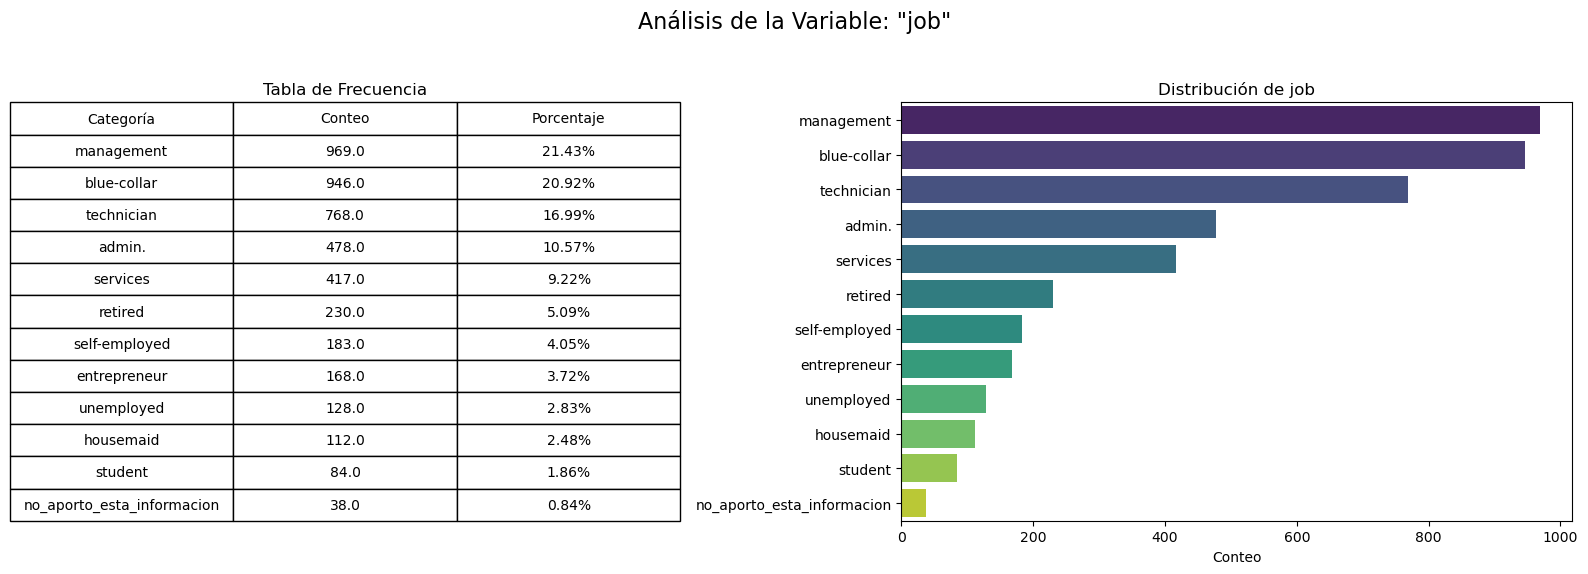

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_2736\3687226779.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_bank_ready[col], order=counts.index, palette='viridis', ax=axes[1])


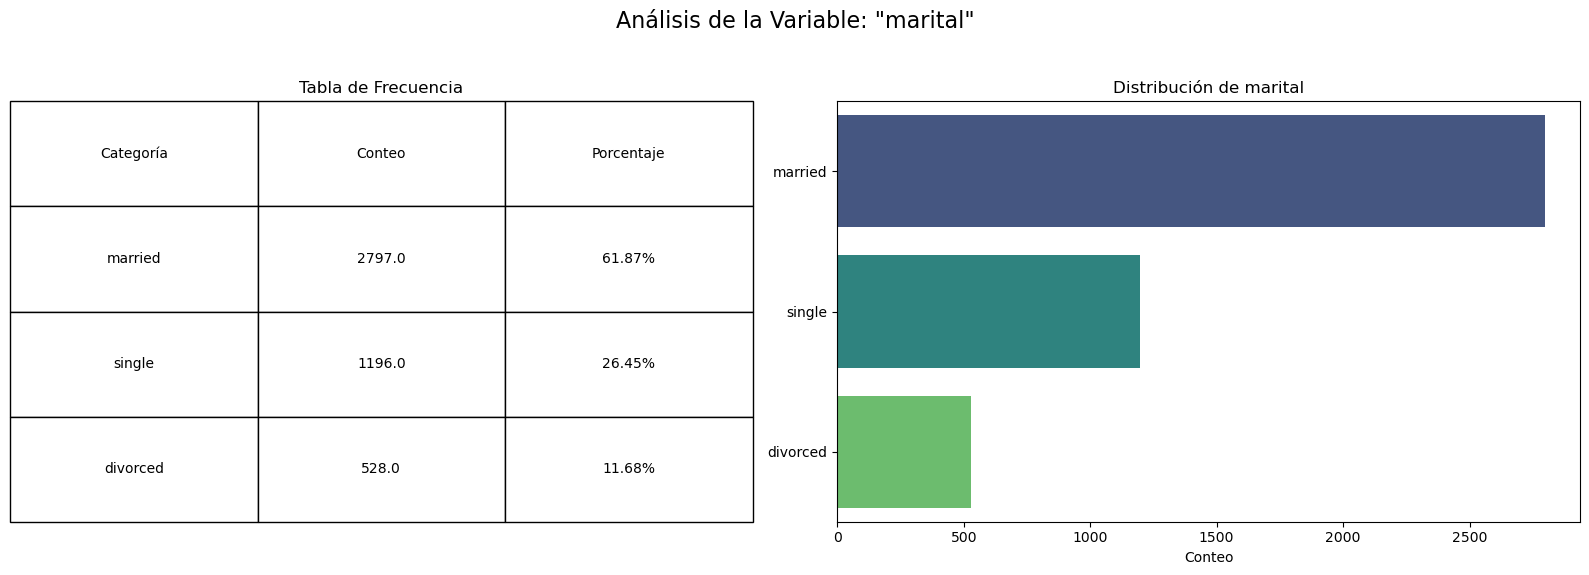

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_2736\3687226779.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_bank_ready[col], order=counts.index, palette='viridis', ax=axes[1])


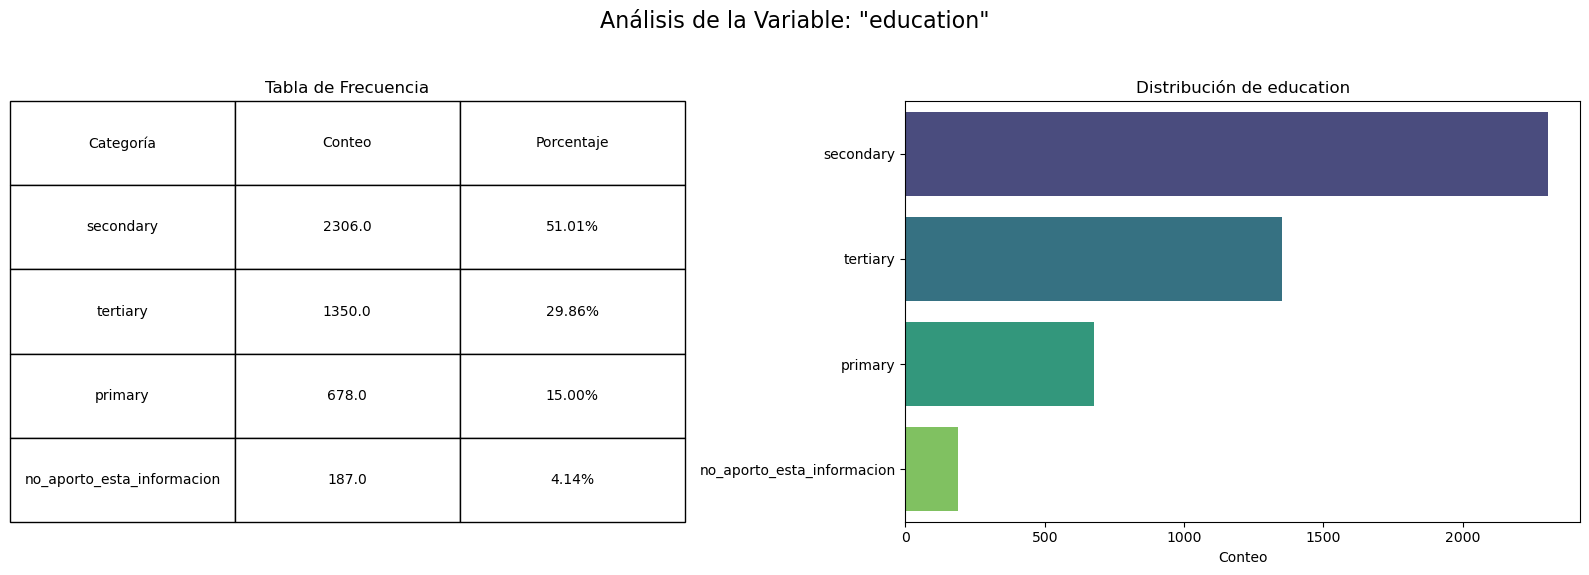

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_2736\3687226779.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_bank_ready[col], order=counts.index, palette='viridis', ax=axes[1])


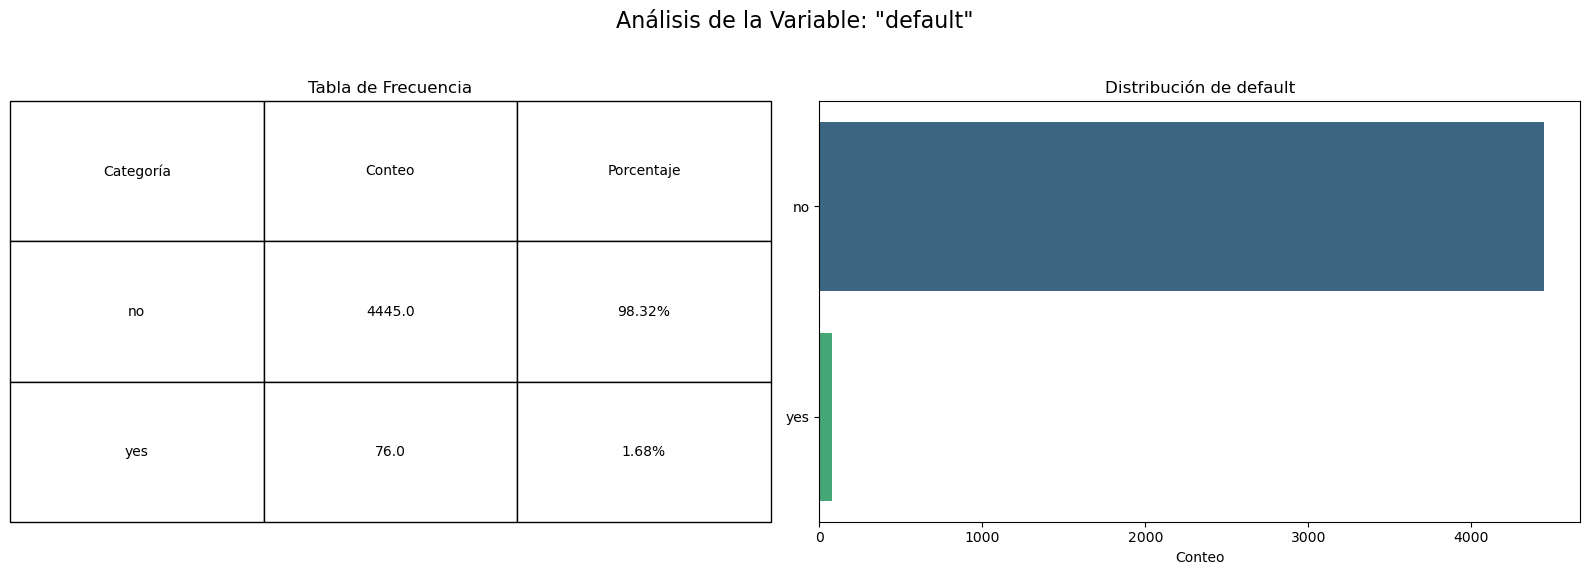

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_2736\3687226779.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_bank_ready[col], order=counts.index, palette='viridis', ax=axes[1])


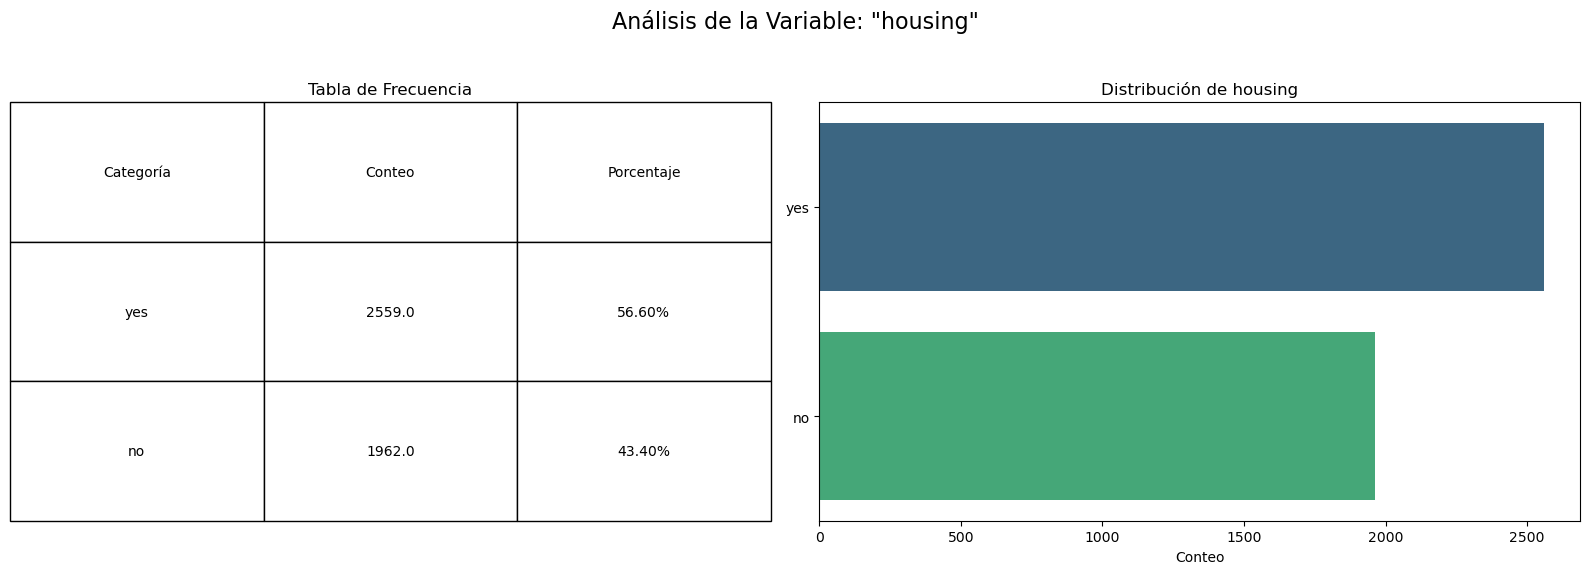

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_2736\3687226779.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_bank_ready[col], order=counts.index, palette='viridis', ax=axes[1])


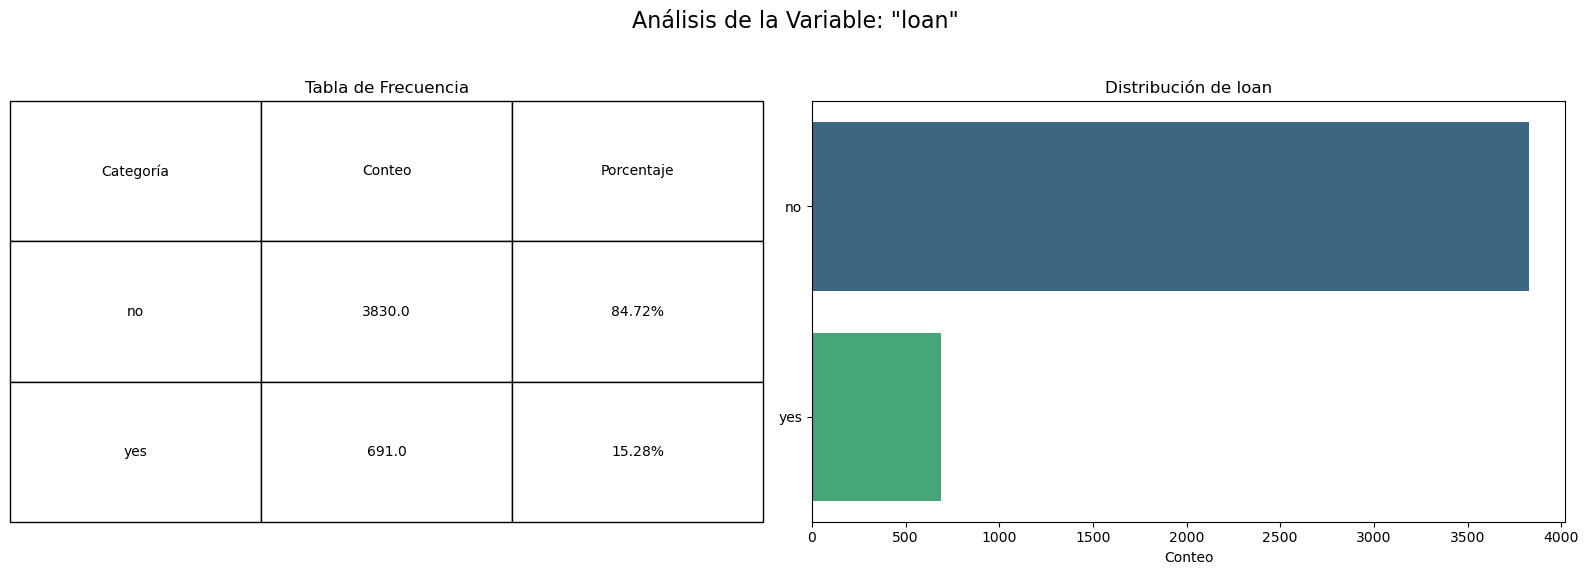

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_2736\3687226779.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_bank_ready[col], order=counts.index, palette='viridis', ax=axes[1])


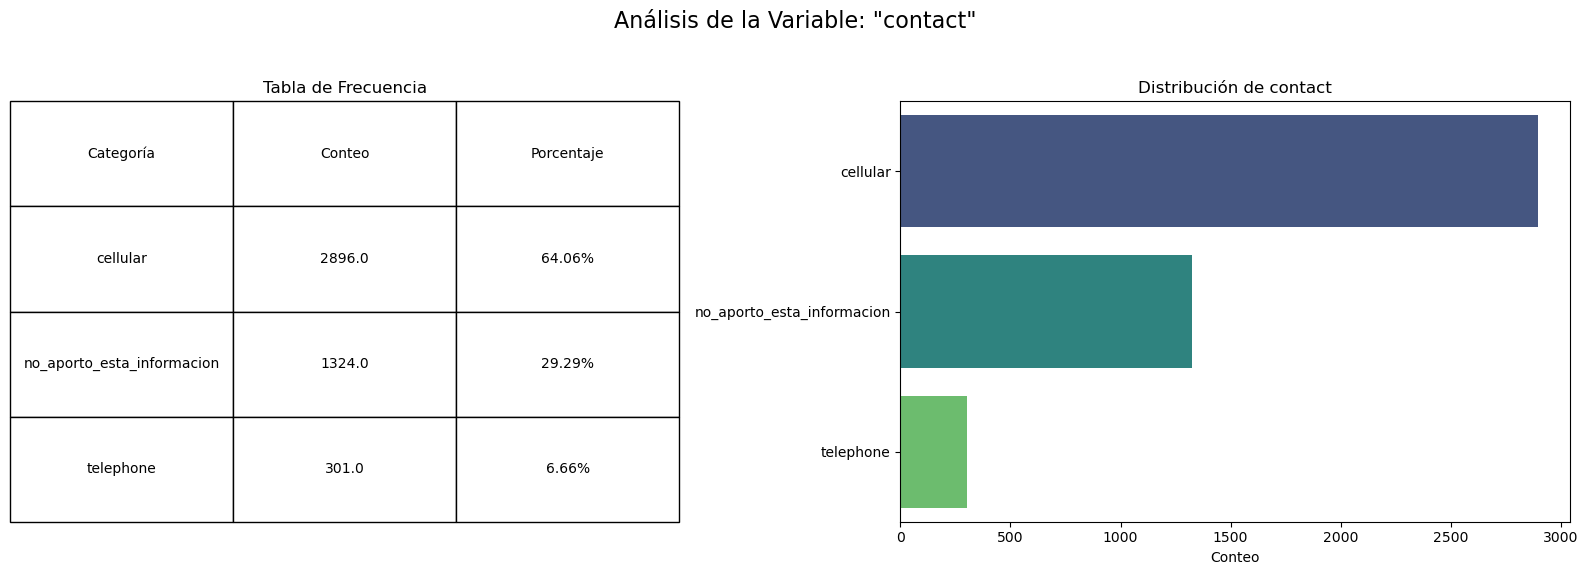

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_2736\3687226779.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_bank_ready[col], order=counts.index, palette='viridis', ax=axes[1])


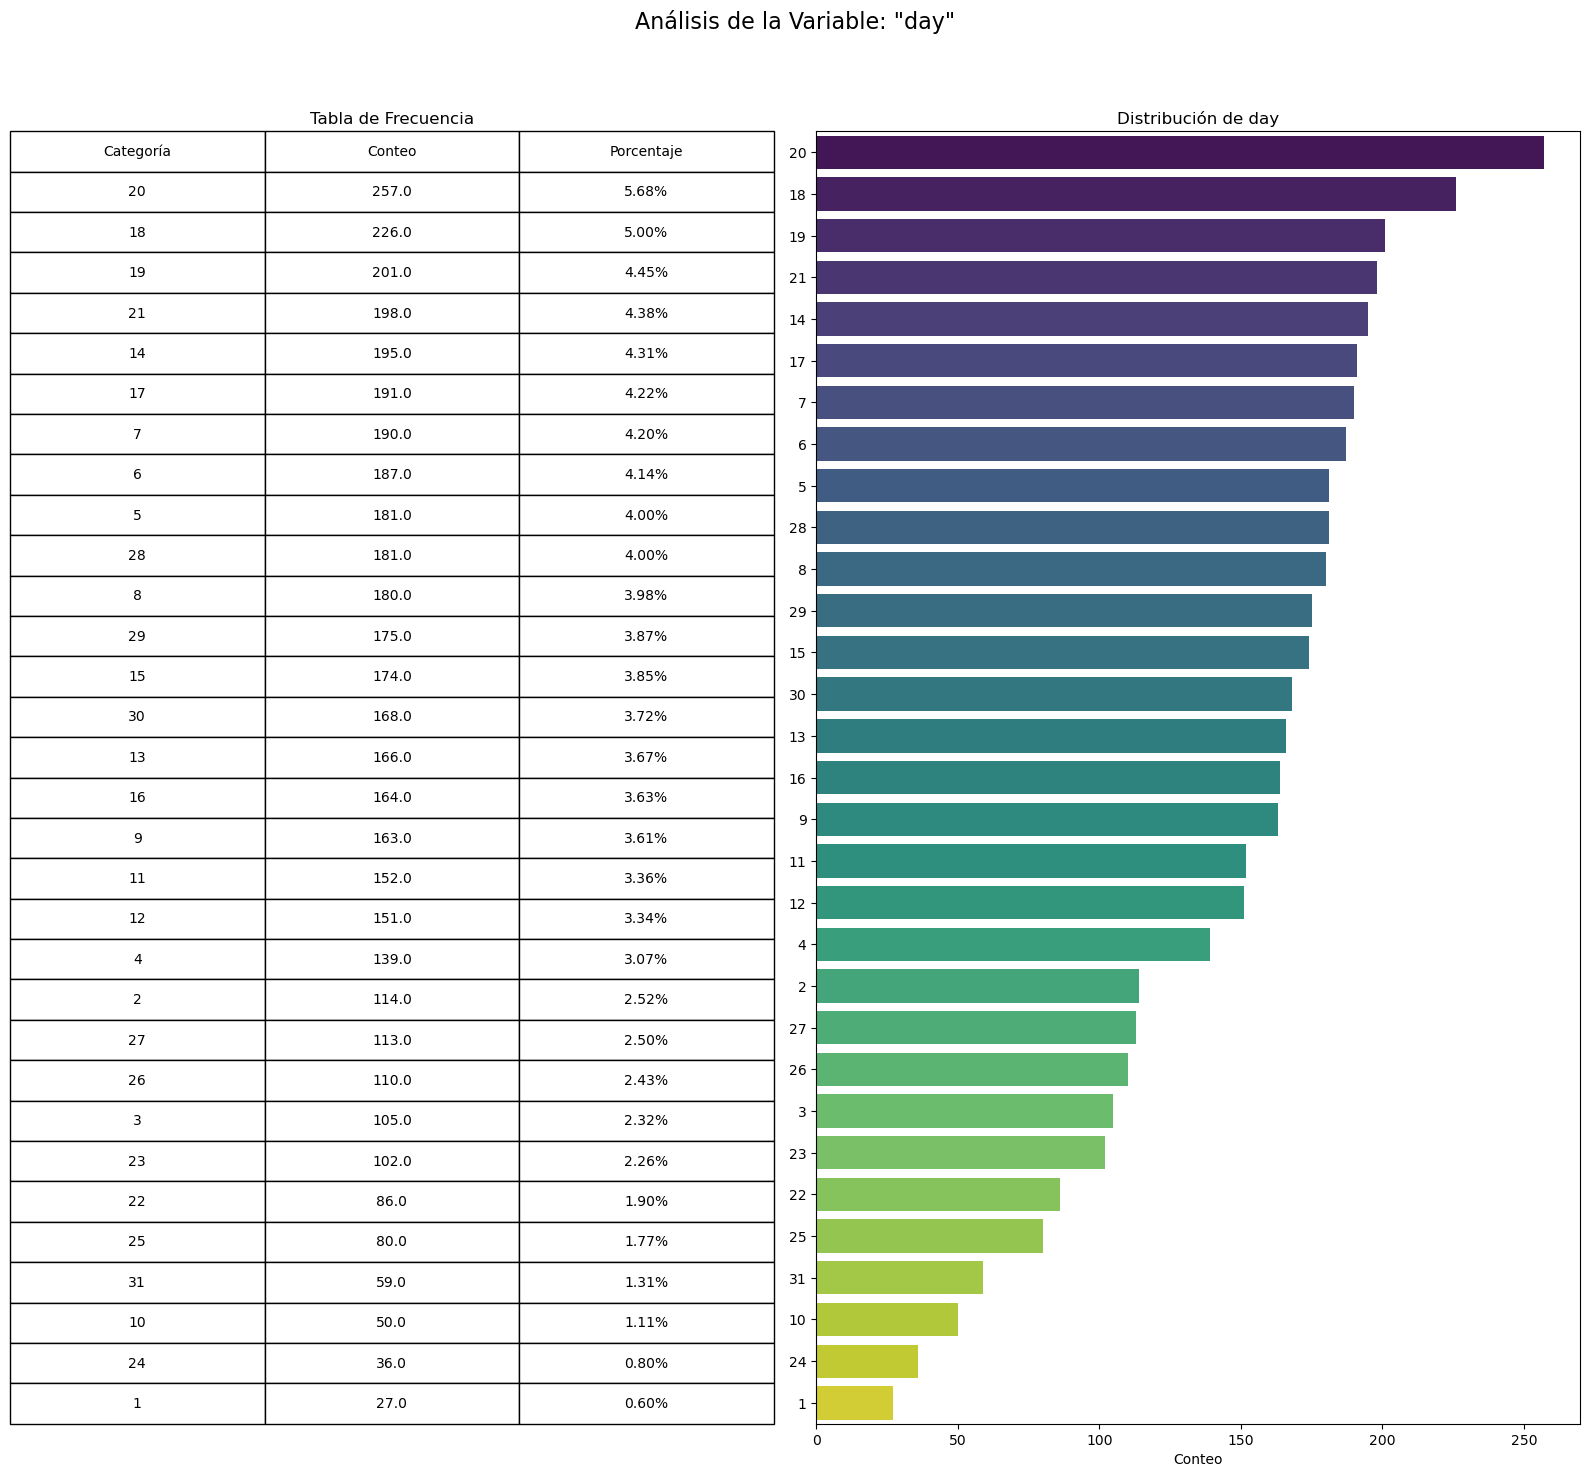

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_2736\3687226779.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_bank_ready[col], order=counts.index, palette='viridis', ax=axes[1])


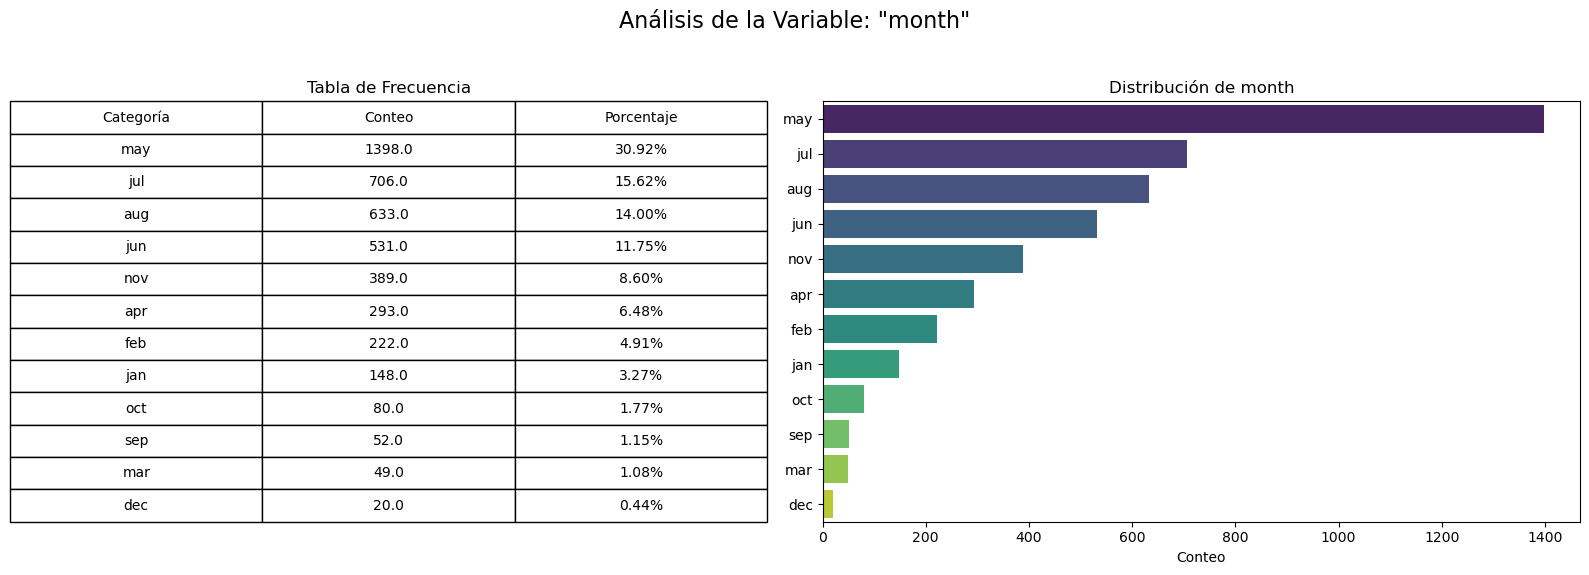

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_2736\3687226779.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_bank_ready[col], order=counts.index, palette='viridis', ax=axes[1])


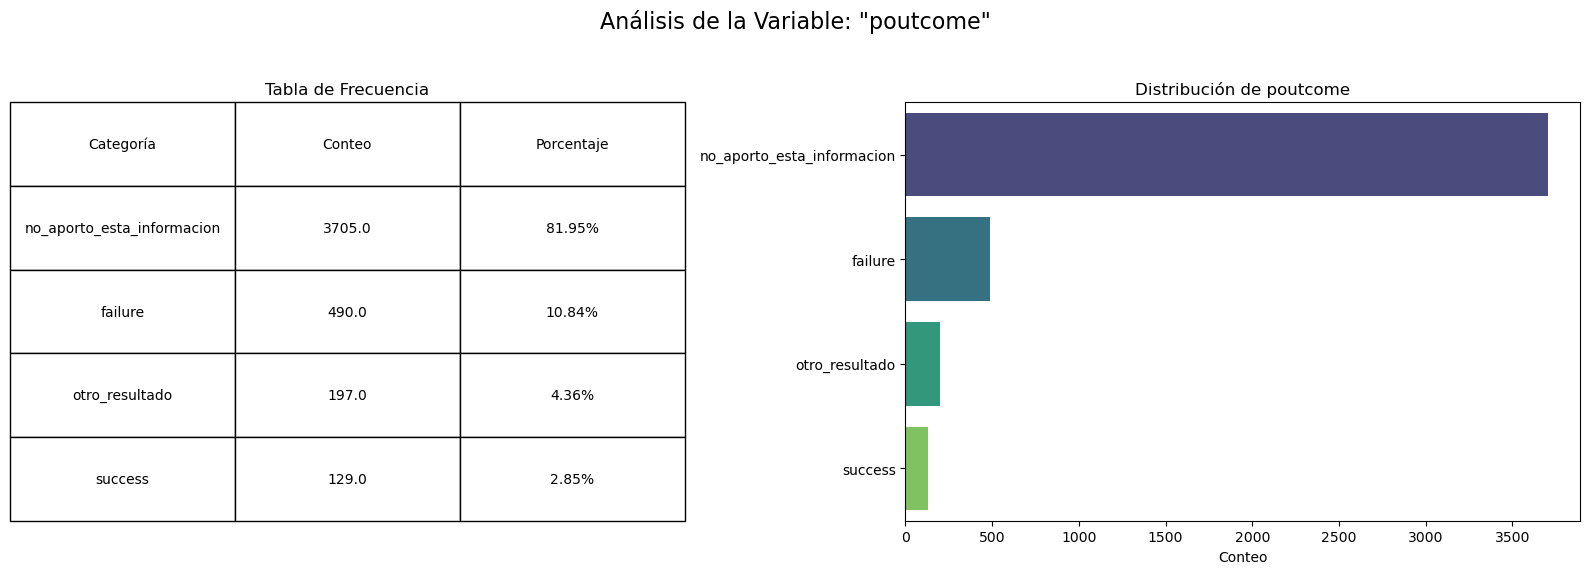

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_2736\3687226779.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_bank_ready[col], order=counts.index, palette='viridis', ax=axes[1])


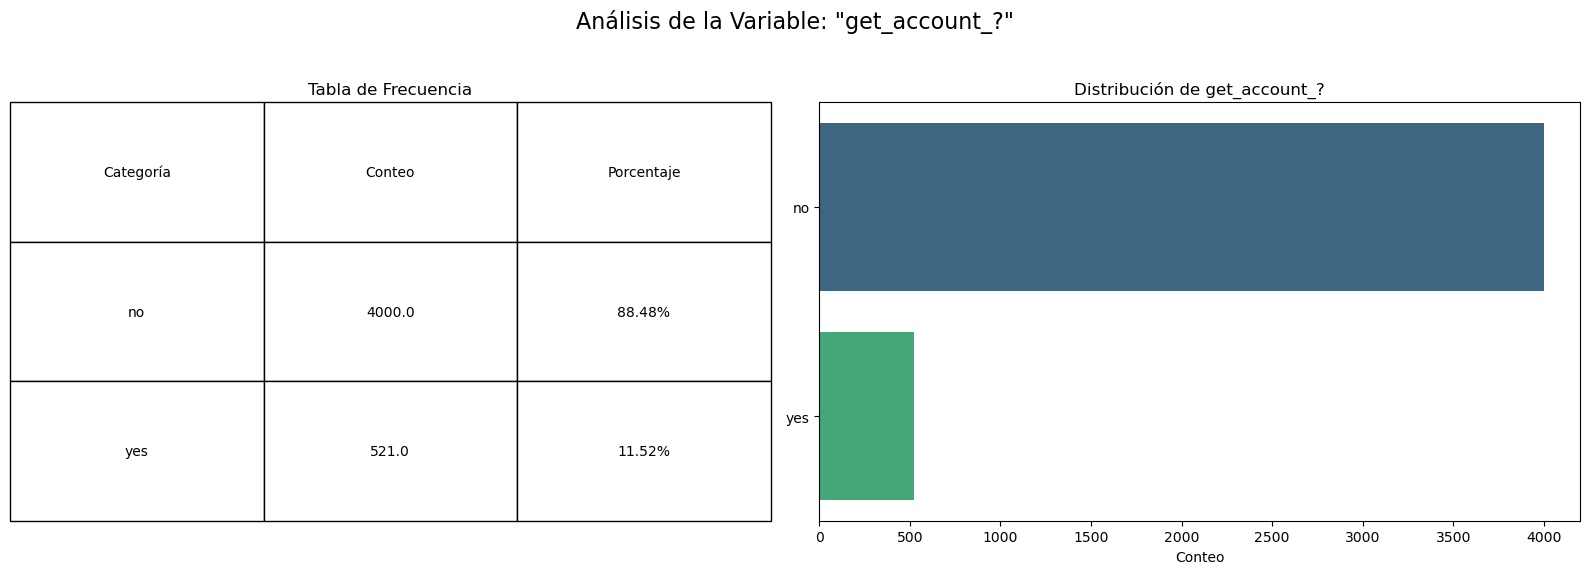

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_2736\3687226779.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_bank_ready[col], order=counts.index, palette='viridis', ax=axes[1])


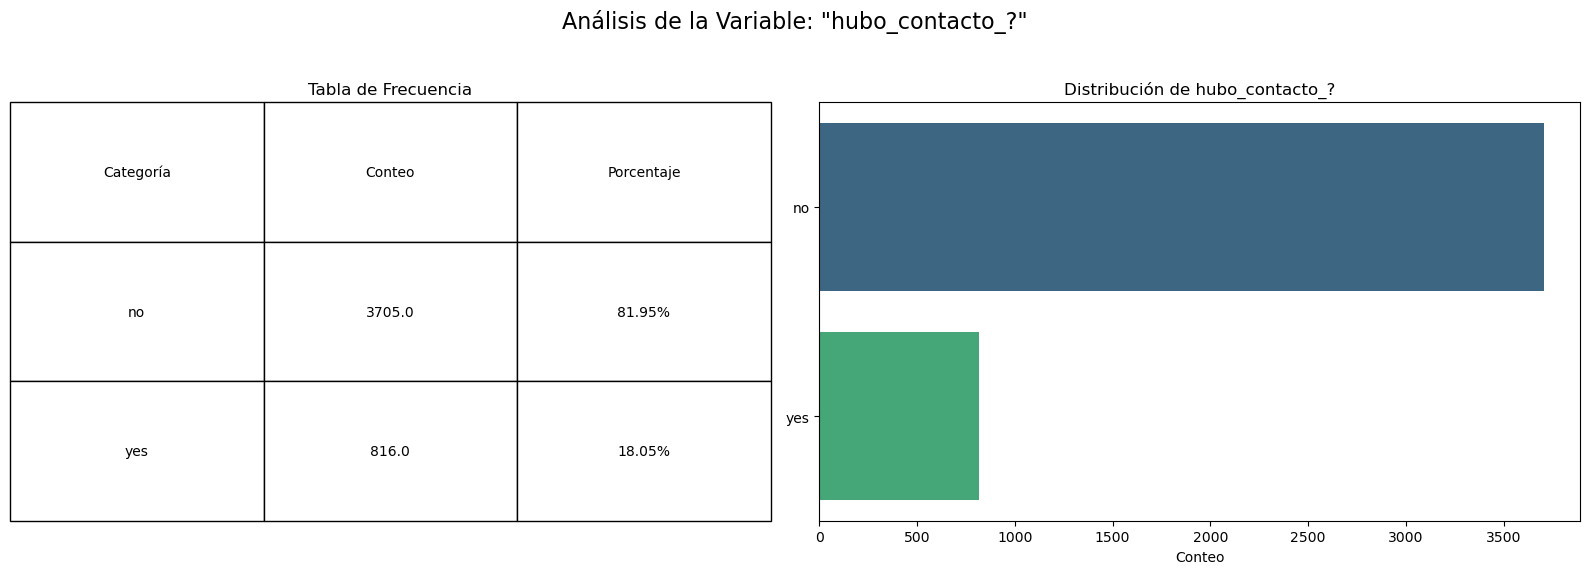

In [10]:
print("--- Análisis Univariado de Variables Categóricas (Tabla y Gráfico Integrados) ---\n")

for col in categorical_cols:
    # Calcular frecuencias y porcentajes
    counts = df_bank_ready[col].value_counts()
    percentages = df_bank_ready[col].value_counts(normalize=True).mul(100).round(2)

    # Crear el DataFrame para la tabla
    summary_df = pd.DataFrame({
        'Conteo': counts,
        'Porcentaje (%)': percentages
    })

    # Convertir el DataFrame a una lista de listas para cellText
    # Asegúrate de que los valores sean cadenas para evitar problemas de formato en la tabla
    cell_text = []
    for index, row in summary_df.iterrows():
        cell_text.append([str(index), str(row['Conteo']), f"{row['Porcentaje (%)']:.2f}%"])

    # Definir las etiquetas de las columnas de la tabla
    col_labels = ['Categoría', 'Conteo', 'Porcentaje']

    # Ajustar el tamaño de la figura dinámicamente según el número de categorías
    # Una fila, dos columnas para tabla y gráfico
    num_categories = len(counts)
    # Aumentar la altura de la figura si hay muchas categorías para que la tabla sea legible
    fig_height = max(6, num_categories * 0.5)
    fig, axes = plt.subplots(1, 2, figsize=(16, fig_height))
    fig.suptitle(f'Análisis de la Variable: "{col}"', fontsize=16)

    # --- Subgráfico para la Tabla de Frecuencia ---
    # Crear la tabla usando plt.table
    table = axes[0].table(cellText=cell_text,
                          colLabels=col_labels,
                          cellLoc='center', # Alineación del texto en las celdas
                          loc='center',     # Posición de la tabla dentro del subgráfico
                          bbox=[0, 0, 1, 1] # Ocupa todo el espacio del subgráfico
                         )

    # Ajustar el tamaño de la fuente de la tabla
    table.auto_set_font_size(False) # Desactivar el ajuste automático para control manual
    table.set_fontsize(10) # Ajustar a un tamaño de fuente que se vea bien

    # Ajustar el tamaño de las celdas de la tabla para que el texto quepa
    table.scale(1, 1.5) # Escala la tabla: 1 en ancho, 1.5 en alto para que las filas no se superpongan
    # También puedes ajustar anchos de columna específicos si es necesario
    # for (row, col), cell in table.get_celld().items():
    #     if row == 0: # Para las cabeceras
    #         cell.set_fontsize(12)
    #     else:
    #         cell.set_fontsize(10)


    axes[0].set_title('Tabla de Frecuencia')
    axes[0].axis('off') # Ocultar ejes para que solo se vea la tabla

    # --- Subgráfico para el Gráfico de Barras ---
    sns.countplot(y=df_bank_ready[col], order=counts.index, palette='viridis', ax=axes[1])
    axes[1].set_title(f'Distribución de {col}')
    axes[1].set_xlabel('Conteo')
    axes[1].set_ylabel('')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar diseño para evitar superposición con suptitle
    plt.show()

    print("\n" + "="*80 + "\n") # Separador entre variables

Hemos terminado el analisis univariado para las variables categorias, las cuales no han aportado mucha informacion pero, ahora le toca el turno a las variables numericas esto lo haremos en otro jupiter y de momento guardaremos el dataset con las transformaciones ya implementadas

In [11]:
df_bank_ready.to_csv('df_bank_t1.csv', index=False, sep=',')